## Capstone Project Submission

- Name: Vivienne DiFrancesco
- Instructor: James Irving
- Pace: Full Time


# Introducion


# Obtain

In [1]:
import numpy as np
np.random.seed(123)

C:\Users\drudi\Anaconda3\envs\learn-env\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\drudi\Anaconda3\envs\learn-env\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\drudi\Anaconda3\envs\learn-env\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import tensorflow as tf
tf.random.set_seed(123)

In [3]:
import pandas as pd
import scipy
import glob, os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Setting inf values to be nan
pd.set_option('mode.use_inf_as_na', True)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Target

In [5]:
def glob_concat(path, file_str):
    '''
    Looks for files in folder path and combines them into a DataFrame.
    
    Args:
        path (str): Location on computer where files are located.
        file_str (str): Specific search query of which files to find.
        
    Returns:
        Displays the files that were found for verification and returns the 
        DataFrame of all files after pd.concat is performed.
    
    Example:
        combined_df = glob_concat(r'File/File', '*.XPT')
    '''
    
    files = glob.glob(os.path.join(path, file_str))
    display(files)
    df_files = [pd.read_sas(file) for file in files]
    combined_df = pd.concat(df_files)
    return combined_df

In [6]:
path = r'Data/Target'
df_target = glob_concat(path, '*.XPT')

['Data/Target\\DPQ_D.XPT',
 'Data/Target\\DPQ_E.XPT',
 'Data/Target\\DPQ_F.XPT',
 'Data/Target\\DPQ_G.XPT',
 'Data/Target\\DPQ_H.XPT',
 'Data/Target\\DPQ_I.XPT',
 'Data/Target\\DPQ_J.XPT']

In [7]:
df_target.head(10)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
0,31130.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,31131.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan
2,31132.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan
3,31134.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan
4,31139.000,0.000,0.000,0.000,0.000,3.000,1.000,0.000,0.000,0.000,0.000
5,31143.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000
6,31144.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan
7,31149.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan
8,31150.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,31151.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000


In [8]:
df_target.SEQN = df_target.SEQN.astype('int64')
df_target.set_index('SEQN', verify_integrity=True, inplace=True)

In [9]:
df_target.drop(columns=['DPQ100'], inplace=True)

In [10]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40496 entries, 31130 to 102956
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  36471 non-null  float64
 1   DPQ020  36465 non-null  float64
 2   DPQ030  36463 non-null  float64
 3   DPQ040  36458 non-null  float64
 4   DPQ050  36458 non-null  float64
 5   DPQ060  36455 non-null  float64
 6   DPQ070  36453 non-null  float64
 7   DPQ080  36452 non-null  float64
 8   DPQ090  36447 non-null  float64
dtypes: float64(9)
memory usage: 3.1 MB


In [11]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
31130,nan,nan,nan,nan,nan,nan,nan,nan,nan
31131,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31132,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31134,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31139,0.000,0.000,0.000,0.000,3.000,1.000,0.000,0.000,0.000


In [12]:
df_target.isna().sum()

DPQ010    4025
DPQ020    4031
DPQ030    4033
DPQ040    4038
DPQ050    4038
DPQ060    4041
DPQ070    4043
DPQ080    4044
DPQ090    4049
dtype: int64

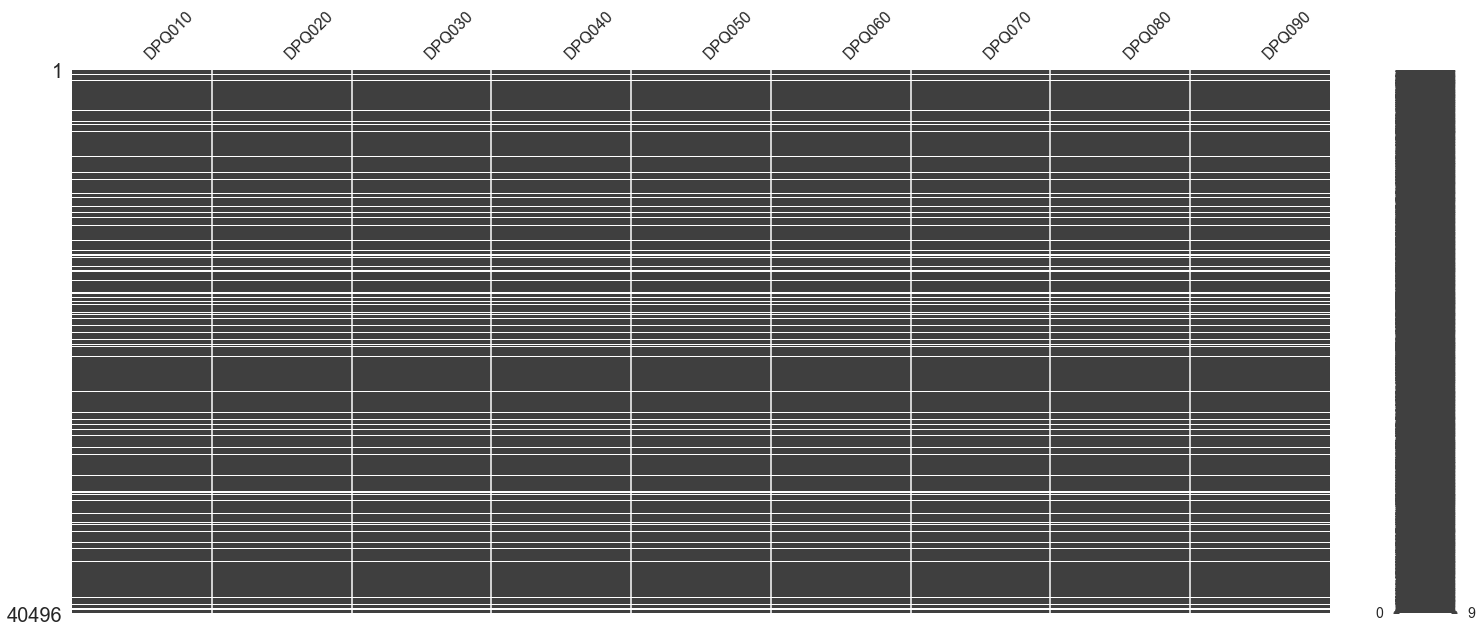

In [13]:
import missingno as ms
ms.matrix(df_target);

In [14]:
df_target.dropna(inplace=True)

In [15]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36447 entries, 31131 to 102956
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  36447 non-null  float64
 1   DPQ020  36447 non-null  float64
 2   DPQ030  36447 non-null  float64
 3   DPQ040  36447 non-null  float64
 4   DPQ050  36447 non-null  float64
 5   DPQ060  36447 non-null  float64
 6   DPQ070  36447 non-null  float64
 7   DPQ080  36447 non-null  float64
 8   DPQ090  36447 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


In [16]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
31131,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31132,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31134,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31139,0.000,0.000,0.000,0.000,3.000,1.000,0.000,0.000,0.000
31143,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000


In [17]:
def val_counts(df):
    for col in df.columns:
        print(f'{col} value counts', '\n')
        display(df[col].value_counts(dropna=False))
        print('--------------------------------------')

In [18]:
val_counts(df_target)

DPQ010 value counts 



0.000    27333
1.000     5946
2.000     1716
3.000     1385
9.000       54
7.000       13
Name: DPQ010, dtype: int64

--------------------------------------
DPQ020 value counts 



0.000    27582
1.000     6117
2.000     1471
3.000     1243
9.000       26
7.000        8
Name: DPQ020, dtype: int64

--------------------------------------
DPQ030 value counts 



0.000    22611
1.000     8120
3.000     3180
2.000     2506
9.000       24
7.000        6
Name: DPQ030, dtype: int64

--------------------------------------
DPQ040 value counts 



0.000    18316
1.000    12057
3.000     3108
2.000     2937
9.000       23
7.000        6
Name: DPQ040, dtype: int64

--------------------------------------
DPQ050 value counts 



0.000    27482
1.000     5614
2.000     1696
3.000     1628
9.000       24
7.000        3
Name: DPQ050, dtype: int64

--------------------------------------
DPQ060 value counts 



0.000    30214
1.000     4161
2.000     1032
3.000      989
9.000       45
7.000        6
Name: DPQ060, dtype: int64

--------------------------------------
DPQ070 value counts 



0.000    30248
1.000     3967
3.000     1126
2.000     1075
9.000       27
7.000        4
Name: DPQ070, dtype: int64

--------------------------------------
DPQ080 value counts 



0.000    32397
1.000     2574
2.000      770
3.000      661
9.000       41
7.000        4
Name: DPQ080, dtype: int64

--------------------------------------
DPQ090 value counts 



0.000    35027
1.000      950
2.000      224
3.000      208
9.000       30
7.000        8
Name: DPQ090, dtype: int64

--------------------------------------


In [19]:
df_target = df_target[(df_target != 7) & (df_target != 9)]

In [20]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
31131,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31132,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31134,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
31139,0.000,0.000,0.000,0.000,3.000,1.000,0.000,0.000,0.000
31143,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000


In [21]:
val_counts(df_target)

DPQ010 value counts 



0.000    27333
1.000     5946
2.000     1716
3.000     1385
nan         67
Name: DPQ010, dtype: int64

--------------------------------------
DPQ020 value counts 



0.000    27582
1.000     6117
2.000     1471
3.000     1243
nan         34
Name: DPQ020, dtype: int64

--------------------------------------
DPQ030 value counts 



0.000    22611
1.000     8120
3.000     3180
2.000     2506
nan         30
Name: DPQ030, dtype: int64

--------------------------------------
DPQ040 value counts 



0.000    18316
1.000    12057
3.000     3108
2.000     2937
nan         29
Name: DPQ040, dtype: int64

--------------------------------------
DPQ050 value counts 



0.000    27482
1.000     5614
2.000     1696
3.000     1628
nan         27
Name: DPQ050, dtype: int64

--------------------------------------
DPQ060 value counts 



0.000    30214
1.000     4161
2.000     1032
3.000      989
nan         51
Name: DPQ060, dtype: int64

--------------------------------------
DPQ070 value counts 



0.000    30248
1.000     3967
3.000     1126
2.000     1075
nan         31
Name: DPQ070, dtype: int64

--------------------------------------
DPQ080 value counts 



0.000    32397
1.000     2574
2.000      770
3.000      661
nan         45
Name: DPQ080, dtype: int64

--------------------------------------
DPQ090 value counts 



0.000    35027
1.000      950
2.000      224
3.000      208
nan         38
Name: DPQ090, dtype: int64

--------------------------------------


In [22]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36447 entries, 31131 to 102956
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  36380 non-null  float64
 1   DPQ020  36413 non-null  float64
 2   DPQ030  36417 non-null  float64
 3   DPQ040  36418 non-null  float64
 4   DPQ050  36420 non-null  float64
 5   DPQ060  36396 non-null  float64
 6   DPQ070  36416 non-null  float64
 7   DPQ080  36402 non-null  float64
 8   DPQ090  36409 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


In [23]:
df_target.isna().sum()

DPQ010    67
DPQ020    34
DPQ030    30
DPQ040    29
DPQ050    27
DPQ060    51
DPQ070    31
DPQ080    45
DPQ090    38
dtype: int64

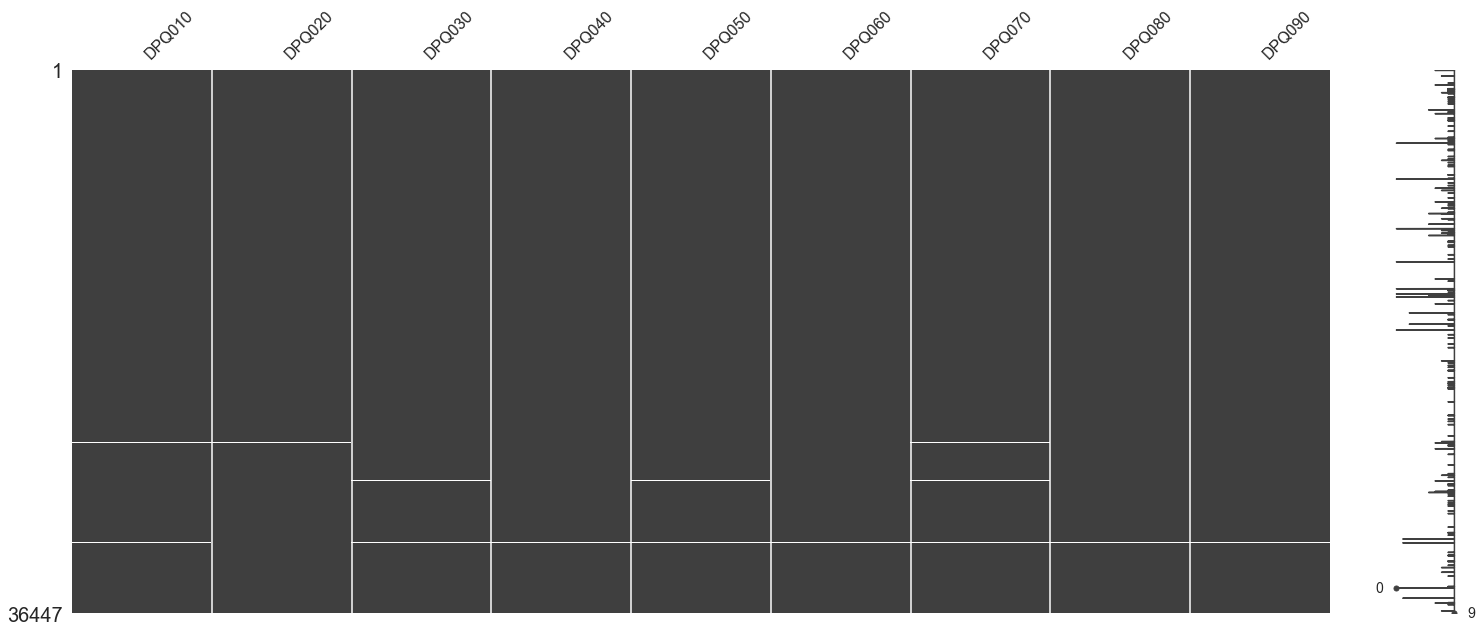

In [24]:
ms.matrix(df_target);

In [25]:
df_target.dropna(inplace=True)

In [26]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36259 entries, 31131 to 102956
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DPQ010  36259 non-null  float64
 1   DPQ020  36259 non-null  float64
 2   DPQ030  36259 non-null  float64
 3   DPQ040  36259 non-null  float64
 4   DPQ050  36259 non-null  float64
 5   DPQ060  36259 non-null  float64
 6   DPQ070  36259 non-null  float64
 7   DPQ080  36259 non-null  float64
 8   DPQ090  36259 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


In [27]:
df_target = df_target.astype('int64')

In [28]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
SEQN,,,,,,,,,
31131,0,0,0,0,0,0,0,0,0
31132,0,0,0,0,0,0,0,0,0
31134,0,0,0,0,0,0,0,0,0
31139,0,0,0,0,3,1,0,0,0
31143,0,1,1,1,1,1,1,0,0


In [29]:
df_target['Total'] = df_target.sum(axis=1)

In [30]:
df_target.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,Total
SEQN,,,,,,,,,,
31131,0,0,0,0,0,0,0,0,0,0
31132,0,0,0,0,0,0,0,0,0,0
31134,0,0,0,0,0,0,0,0,0,0
31139,0,0,0,0,3,1,0,0,0,4
31143,0,1,1,1,1,1,1,0,0,6


In [31]:
df_target.Total.value_counts(1)

0    0.329
1    0.149
2    0.119
3    0.091
4    0.065
5    0.047
6    0.039
7    0.030
8    0.024
9    0.019
10   0.016
11   0.012
12   0.010
13   0.009
14   0.008
15   0.006
16   0.005
17   0.004
18   0.004
19   0.003
21   0.002
20   0.002
22   0.001
24   0.001
23   0.001
25   0.001
27   0.000
26   0.000
Name: Total, dtype: float64

In [32]:
df_target['Category'] = df_target.Total.apply(lambda x: 'Not Depressed' if x<10 else 'Depressed')

In [33]:
df_target.Category.value_counts(1)

Not Depressed   0.913
Depressed       0.087
Name: Category, dtype: float64

In [34]:
series_target = pd.Series(df_target['Category'])
series_target.head()

SEQN
31131    Not Depressed
31132    Not Depressed
31134    Not Depressed
31139    Not Depressed
31143    Not Depressed
Name: Category, dtype: object

In [35]:
series_target.value_counts(1)

Not Depressed   0.913
Depressed       0.087
Name: Category, dtype: float64

# Demographic Data

In [36]:
path = r'Data/Demographics'
df_demo = glob_concat(path, '*.XPT')

['Data/Demographics\\DEMO_D.XPT',
 'Data/Demographics\\DEMO_E.XPT',
 'Data/Demographics\\DEMO_F.XPT',
 'Data/Demographics\\DEMO_G.XPT',
 'Data/Demographics\\DEMO_H.XPT',
 'Data/Demographics\\DEMO_I.XPT',
 'Data/Demographics\\DEMO_J.XPT']

In [37]:
df_demo.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,DMQMILIT,...,DMDBORN4,AIALANGA,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRBR4,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ
0,31127.000,4.000,2.000,2.000,1.000,0.000,11.000,12.000,3.000,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,31128.000,4.000,2.000,1.000,2.000,11.000,132.000,132.000,4.000,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,31129.000,4.000,2.000,2.000,1.000,15.000,189.000,190.000,4.000,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,31130.000,4.000,2.000,2.000,2.000,85.000,nan,nan,3.000,2.000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,31131.000,4.000,2.000,2.000,2.000,44.000,535.000,536.000,4.000,2.000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [38]:
df_demo.SEQN = df_demo.SEQN.astype('int64')
df_demo.set_index('SEQN', verify_integrity=True, inplace=True)

In [39]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 61 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SDDSRVYR  70190 non-null  float64
 1   RIDSTATR  70190 non-null  float64
 2   RIDEXMON  67364 non-null  float64
 3   RIAGENDR  70190 non-null  float64
 4   RIDAGEYR  70190 non-null  float64
 5   RIDAGEMN  32591 non-null  float64
 6   RIDAGEEX  28999 non-null  float64
 7   RIDRETH1  70190 non-null  float64
 8   DMQMILIT  18934 non-null  float64
 9   DMDBORN   10348 non-null  float64
 10  DMDCITZN  70163 non-null  float64
 11  DMDYRSUS  13405 non-null  float64
 12  DMDEDUC3  18882 non-null  float64
 13  DMDEDUC2  39749 non-null  float64
 14  DMDSCHOL  7807 non-null   float64
 15  DMDMARTL  41468 non-null  float64
 16  DMDHHSIZ  70190 non-null  float64
 17  DMDFMSIZ  70190 non-null  float64
 18  INDHHINC  10216 non-null  float64
 19  INDFMINC  10238 non-null  float64
 20  INDFMPIR  63858 non-nul

In [40]:
df_demo.columns.sort_values()

Index(['AIALANG', 'AIALANGA', 'DMDBORN', 'DMDBORN2', 'DMDBORN4', 'DMDCITZN',
       'DMDEDUC2', 'DMDEDUC3', 'DMDFMSIZ', 'DMDHHSIZ', 'DMDHHSZA', 'DMDHHSZB',
       'DMDHHSZE', 'DMDHRAGE', 'DMDHRAGZ', 'DMDHRBR2', 'DMDHRBR4', 'DMDHRBRN',
       'DMDHREDU', 'DMDHREDZ', 'DMDHRGND', 'DMDHRMAR', 'DMDHRMAZ', 'DMDHSEDU',
       'DMDHSEDZ', 'DMDMARTL', 'DMDSCHOL', 'DMDYRSUS', 'DMQADFC', 'DMQMILIT',
       'DMQMILIZ', 'FIAINTRP', 'FIALANG', 'FIAPROXY', 'INDFMIN2', 'INDFMINC',
       'INDFMPIR', 'INDHHIN2', 'INDHHINC', 'MIAINTRP', 'MIALANG', 'MIAPROXY',
       'RIAGENDR', 'RIDAGEEX', 'RIDAGEMN', 'RIDAGEYR', 'RIDEXAGM', 'RIDEXAGY',
       'RIDEXMON', 'RIDEXPRG', 'RIDRETH1', 'RIDRETH3', 'RIDSTATR', 'SDDSRVYR',
       'SDMVPSU', 'SDMVSTRA', 'SIAINTRP', 'SIALANG', 'SIAPROXY', 'WTINT2YR',
       'WTMEC2YR'],
      dtype='object')

In [41]:
demo_tokeep = ['DMDBORN', 'DMDBORN2', 'DMDBORN4', 'DMDCITZN', 'DMDEDUC2', 
               'DMDHHSIZ', 'DMDMARTL', 'DMQMILIT', 'DMQMILIZ', 'INDHHIN2', 
               'INDHHINC', 'RIAGENDR', 'RIDAGEYR', 'RIDEXPRG', 'RIDRETH1', 
               'SDDSRVYR']

In [42]:
def cols_tokeep(df, col_list):
    df_copy = df.copy()
    for col in df_copy.columns:
        if col not in col_list:
            df_copy.drop(columns=[col], inplace=True)
        else:
            pass
    return df_copy

In [43]:
demo_clean = cols_tokeep(df_demo, demo_tokeep)

In [44]:
demo_clean.head()

,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH1,DMQMILIT,DMDBORN,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,INDHHINC,RIDEXPRG,DMDBORN2,INDHHIN2,DMQMILIZ,DMDBORN4
SEQN,,,,,,,,,,,,,,,,
31127,4.000,1.000,0.000,3.000,nan,1.000,1.000,nan,nan,4.000,4.000,nan,nan,nan,nan,nan
31128,4.000,2.000,11.000,4.000,nan,1.000,1.000,nan,nan,7.000,8.000,2.000,nan,nan,nan,nan
31129,4.000,1.000,15.000,4.000,nan,1.000,1.000,nan,5.000,6.000,10.000,nan,nan,nan,nan,nan
31130,4.000,2.000,85.000,3.000,2.000,1.000,1.000,4.000,2.000,1.000,4.000,nan,nan,nan,nan,nan
31131,4.000,2.000,44.000,4.000,2.000,1.000,1.000,4.000,1.000,4.000,11.000,2.000,nan,nan,nan,nan


In [45]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SDDSRVYR  70190 non-null  float64
 1   RIAGENDR  70190 non-null  float64
 2   RIDAGEYR  70190 non-null  float64
 3   RIDRETH1  70190 non-null  float64
 4   DMQMILIT  18934 non-null  float64
 5   DMDBORN   10348 non-null  float64
 6   DMDCITZN  70163 non-null  float64
 7   DMDEDUC2  39749 non-null  float64
 8   DMDMARTL  41468 non-null  float64
 9   DMDHHSIZ  70190 non-null  float64
 10  INDHHINC  10216 non-null  float64
 11  RIDEXPRG  10901 non-null  float64
 12  DMDBORN2  20686 non-null  float64
 13  INDHHIN2  58628 non-null  float64
 14  DMQMILIZ  24421 non-null  float64
 15  DMDBORN4  39156 non-null  float64
dtypes: float64(16)
memory usage: 9.1 MB


In [46]:
demo_clean.columns.sort_values()

Index(['DMDBORN', 'DMDBORN2', 'DMDBORN4', 'DMDCITZN', 'DMDEDUC2', 'DMDHHSIZ',
       'DMDMARTL', 'DMQMILIT', 'DMQMILIZ', 'INDHHIN2', 'INDHHINC', 'RIAGENDR',
       'RIDAGEYR', 'RIDEXPRG', 'RIDRETH1', 'SDDSRVYR'],
      dtype='object')

## Birth Place

In [47]:
demo_clean.DMDBORN.value_counts(dropna=False)

nan      59842
1.000     8794
2.000      961
3.000      588
7.000        5
Name: DMDBORN, dtype: int64

In [48]:
demo_clean.DMDBORN2.value_counts(dropna=False)

nan      49504
1.000    16938
2.000     1550
4.000     1120
5.000     1065
7.000       11
9.000        2
Name: DMDBORN2, dtype: int64

In [49]:
demo_clean.DMDBORN4.value_counts(dropna=False)

nan       31034
1.000     30966
2.000      8175
77.000        8
99.000        7
Name: DMDBORN4, dtype: int64

In [50]:
demo_clean.DMDBORN.fillna(0, inplace=True)
demo_clean.DMDBORN2.fillna(0, inplace=True)
demo_clean.DMDBORN4.fillna(0, inplace=True)

In [51]:
demo_clean['birth_place'] = demo_clean['DMDBORN'] + demo_clean['DMDBORN2'] + demo_clean['DMDBORN4']

In [52]:
demo_clean.head()

,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH1,DMQMILIT,DMDBORN,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,INDHHINC,RIDEXPRG,DMDBORN2,INDHHIN2,DMQMILIZ,DMDBORN4,birth_place
SEQN,,,,,,,,,,,,,,,,,
31127,4.000,1.000,0.000,3.000,nan,1.000,1.000,nan,nan,4.000,4.000,nan,0.000,nan,nan,0.000,1.000
31128,4.000,2.000,11.000,4.000,nan,1.000,1.000,nan,nan,7.000,8.000,2.000,0.000,nan,nan,0.000,1.000
31129,4.000,1.000,15.000,4.000,nan,1.000,1.000,nan,5.000,6.000,10.000,nan,0.000,nan,nan,0.000,1.000
31130,4.000,2.000,85.000,3.000,2.000,1.000,1.000,4.000,2.000,1.000,4.000,nan,0.000,nan,nan,0.000,1.000
31131,4.000,2.000,44.000,4.000,2.000,1.000,1.000,4.000,1.000,4.000,11.000,2.000,0.000,nan,nan,0.000,1.000


In [53]:
demo_clean.birth_place.value_counts(dropna=False)

1.000     56698
2.000     10686
4.000      1120
5.000      1065
3.000       588
7.000        16
77.000        8
99.000        7
9.000         2
Name: birth_place, dtype: int64

In [54]:
demo_clean.drop(columns=['DMDBORN', 'DMDBORN2', 'DMDBORN4'], inplace=True)

In [55]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SDDSRVYR     70190 non-null  float64
 1   RIAGENDR     70190 non-null  float64
 2   RIDAGEYR     70190 non-null  float64
 3   RIDRETH1     70190 non-null  float64
 4   DMQMILIT     18934 non-null  float64
 5   DMDCITZN     70163 non-null  float64
 6   DMDEDUC2     39749 non-null  float64
 7   DMDMARTL     41468 non-null  float64
 8   DMDHHSIZ     70190 non-null  float64
 9   INDHHINC     10216 non-null  float64
 10  RIDEXPRG     10901 non-null  float64
 11  INDHHIN2     58628 non-null  float64
 12  DMQMILIZ     24421 non-null  float64
 13  birth_place  70190 non-null  float64
dtypes: float64(14)
memory usage: 8.0 MB


## Veteran

In [56]:
demo_clean.DMQMILIT.value_counts(dropna=False)

nan      51256
2.000    16685
1.000     2242
7.000        6
9.000        1
Name: DMQMILIT, dtype: int64

In [57]:
demo_clean.DMQMILIZ.value_counts(dropna=False)

nan      45769
2.000    22235
1.000     2182
7.000        3
9.000        1
Name: DMQMILIZ, dtype: int64

In [58]:
demo_clean.DMQMILIT.fillna(0, inplace=True)
demo_clean.DMQMILIZ.fillna(0, inplace=True)

In [59]:
demo_clean['veteran'] = demo_clean['DMQMILIT'] + demo_clean['DMQMILIZ']

In [60]:
demo_clean.veteran.value_counts(dropna=False)

2.000    38920
0.000    26835
1.000     4424
7.000        9
9.000        2
Name: veteran, dtype: int64

In [61]:
demo_clean.drop(columns=['DMQMILIT', 'DMQMILIZ'], inplace=True)

In [62]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SDDSRVYR     70190 non-null  float64
 1   RIAGENDR     70190 non-null  float64
 2   RIDAGEYR     70190 non-null  float64
 3   RIDRETH1     70190 non-null  float64
 4   DMDCITZN     70163 non-null  float64
 5   DMDEDUC2     39749 non-null  float64
 6   DMDMARTL     41468 non-null  float64
 7   DMDHHSIZ     70190 non-null  float64
 8   INDHHINC     10216 non-null  float64
 9   RIDEXPRG     10901 non-null  float64
 10  INDHHIN2     58628 non-null  float64
 11  birth_place  70190 non-null  float64
 12  veteran      70190 non-null  float64
dtypes: float64(13)
memory usage: 7.5 MB


## Household Income

In [63]:
demo_clean.INDHHINC.value_counts(dropna=False)

nan       59974
11.000     2195
6.000      1331
7.000       995
8.000       922
5.000       818
3.000       803
4.000       801
9.000       619
10.000      557
2.000       428
1.000       255
12.000      186
99.000      161
13.000       74
77.000       71
Name: INDHHINC, dtype: int64

In [64]:
demo_clean.INDHHIN2.value_counts(dropna=False)

nan       11562
15.000     9126
6.000      6919
7.000      5498
14.000     5171
5.000      4596
8.000      4310
4.000      4056
3.000      3857
9.000      3337
10.000     2683
2.000      2430
12.000     2094
1.000      1563
77.000     1244
99.000      987
13.000      757
Name: INDHHIN2, dtype: int64

In [65]:
demo_clean.INDHHINC.fillna(0, inplace=True)
demo_clean.INDHHIN2.fillna(0, inplace=True)

In [66]:
demo_clean['household_income'] = demo_clean['INDHHINC'] + demo_clean['INDHHIN2']

In [67]:
demo_clean.household_income.value_counts(dropna=False)

15.000    9126
6.000     8250
7.000     6493
5.000     5414
8.000     5232
14.000    5171
4.000     4857
3.000     4660
9.000     3956
10.000    3240
2.000     2858
12.000    2280
11.000    2195
1.000     1818
0.000     1346
77.000    1315
99.000    1148
13.000     831
Name: household_income, dtype: int64

In [68]:
demo_clean.drop(columns=['INDHHINC', 'INDHHIN2'], inplace=True)

In [69]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SDDSRVYR          70190 non-null  float64
 1   RIAGENDR          70190 non-null  float64
 2   RIDAGEYR          70190 non-null  float64
 3   RIDRETH1          70190 non-null  float64
 4   DMDCITZN          70163 non-null  float64
 5   DMDEDUC2          39749 non-null  float64
 6   DMDMARTL          41468 non-null  float64
 7   DMDHHSIZ          70190 non-null  float64
 8   RIDEXPRG          10901 non-null  float64
 9   birth_place       70190 non-null  float64
 10  veteran           70190 non-null  float64
 11  household_income  70190 non-null  float64
dtypes: float64(12)
memory usage: 7.0 MB


## Renaming Columns

In [70]:
demo_clean.rename(columns={'DMDCITZN': 'citizenship', 
                           'DMDEDUC2': 'education_level', 
                           'DMDHHSIZ': 'household_size', 
                           'DMDMARTL': 'marital_status', 
                           'RIAGENDR': 'gender', 
                           'RIDAGEYR': 'age', 
                           'RIDEXPRG': 'pregnant',
                           'RIDRETH1': 'race',
                           'SDDSRVYR': 'year'}, inplace=True)

In [71]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              70190 non-null  float64
 1   gender            70190 non-null  float64
 2   age               70190 non-null  float64
 3   race              70190 non-null  float64
 4   citizenship       70163 non-null  float64
 5   education_level   39749 non-null  float64
 6   marital_status    41468 non-null  float64
 7   household_size    70190 non-null  float64
 8   pregnant          10901 non-null  float64
 9   birth_place       70190 non-null  float64
 10  veteran           70190 non-null  float64
 11  household_income  70190 non-null  float64
dtypes: float64(12)
memory usage: 7.0 MB


## Clean Column Values

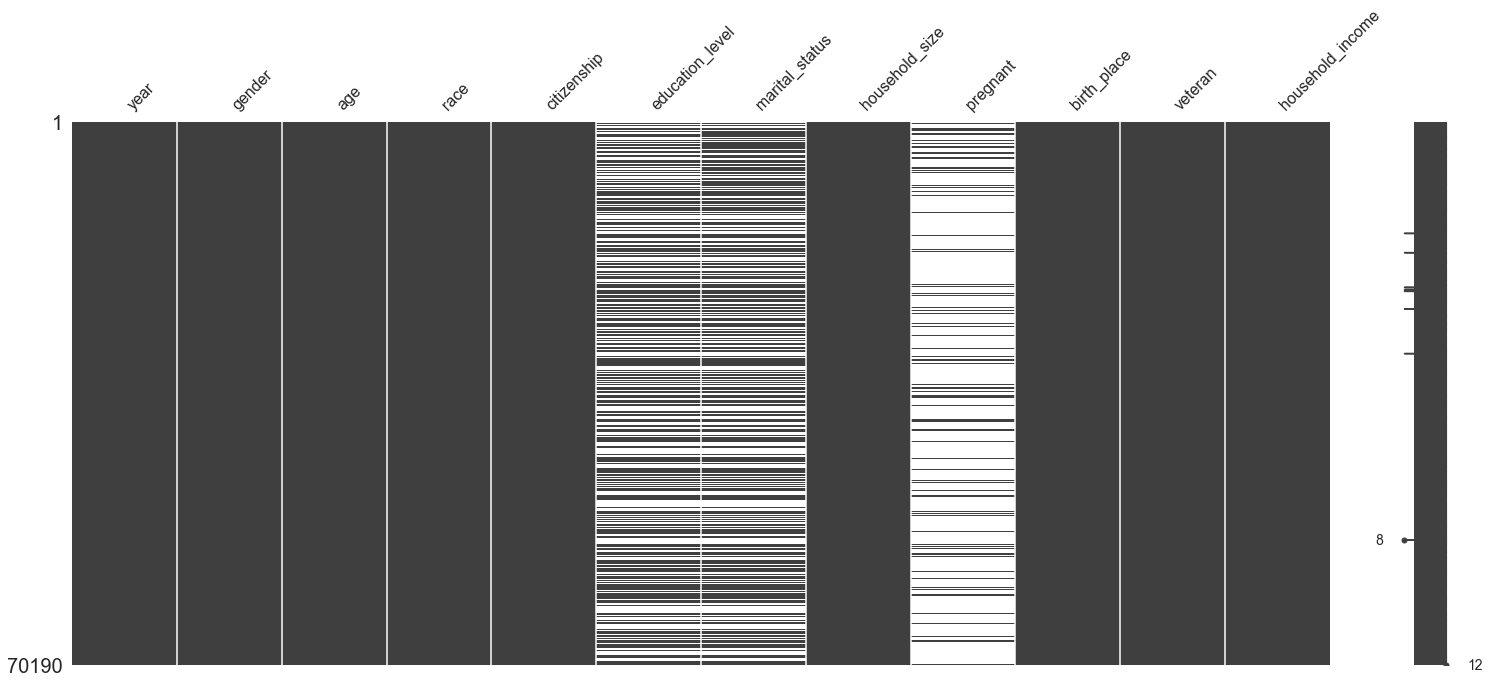

In [72]:
ms.matrix(demo_clean);

In [73]:
val_counts(demo_clean)

year value counts 



6.000     10537
4.000     10348
8.000     10175
5.000     10149
9.000      9971
7.000      9756
10.000     9254
Name: year, dtype: int64

--------------------------------------
gender value counts 



2.000    35481
1.000    34709
Name: gender, dtype: int64

--------------------------------------
age value counts 



0.000     2987
80.000    2428
2.000     2121
1.000     2005
4.000     1585
          ... 
85.000     170
81.000      59
82.000      44
83.000      39
84.000      36
Name: age, Length: 86, dtype: int64

--------------------------------------
race value counts 



3.000    25326
4.000    16072
1.000    13761
5.000     8184
2.000     6847
Name: race, dtype: int64

--------------------------------------
citizenship value counts 



1.000    62794
2.000     7257
7.000       87
nan         27
9.000       25
Name: citizenship, dtype: int64

--------------------------------------
education_level value counts 



nan      30441
4.000    11561
3.000     9102
5.000     8935
2.000     5708
1.000     4382
9.000       42
7.000       19
Name: education_level, dtype: int64

--------------------------------------
marital_status value counts 



nan       28722
1.000     20284
5.000      8857
3.000      4292
2.000      3371
6.000      3279
4.000      1349
77.000       31
99.000        5
Name: marital_status, dtype: int64

--------------------------------------
household_size value counts 



4.000    14745
2.000    13308
3.000    12368
5.000    11293
7.000     6421
6.000     6262
1.000     5793
Name: household_size, dtype: int64

--------------------------------------
pregnant value counts 



nan      59289
2.000     9460
1.000      754
3.000      687
Name: pregnant, dtype: int64

--------------------------------------
birth_place value counts 



1.000     56698
2.000     10686
4.000      1120
5.000      1065
3.000       588
7.000        16
77.000        8
99.000        7
9.000         2
Name: birth_place, dtype: int64

--------------------------------------
veteran value counts 



2.000    38920
0.000    26835
1.000     4424
7.000        9
9.000        2
Name: veteran, dtype: int64

--------------------------------------
household_income value counts 



15.000    9126
6.000     8250
7.000     6493
5.000     5414
8.000     5232
14.000    5171
4.000     4857
3.000     4660
9.000     3956
10.000    3240
2.000     2858
12.000    2280
11.000    2195
1.000     1818
0.000     1346
77.000    1315
99.000    1148
13.000     831
Name: household_income, dtype: int64

--------------------------------------


In [74]:
demo_clean['year'] = demo_clean['year'].astype('int64')

In [75]:
demo_clean['gender'].replace({2.000:1, 1.000:0}, inplace=True)
demo_clean['gender'] = demo_clean['gender'].astype('int64')

In [76]:
demo_clean.gender.value_counts()

1    35481
0    34709
Name: gender, dtype: int64

In [77]:
demo_clean['age'] = demo_clean['age'].astype('int64')

In [78]:
demo_clean['race'].replace({1.000:'Mexican', 
                            2.000:'Other Hispanic', 
                            3.000:'White', 
                            4.000:'Black', 
                            5.000:'Other and Multiracial'}, 
                           inplace=True)

In [79]:
demo_clean.race.value_counts()

White                    25326
Black                    16072
Mexican                  13761
Other and Multiracial     8184
Other Hispanic            6847
Name: race, dtype: int64

In [80]:
demo_clean['citizenship'].replace({1.000:'Citizen', 
                                   2.000:'Not Citizen', 
                                   7.000:'Missing', 
                                   9.000:'Missing'}, 
                                  inplace=True)
demo_clean['citizenship'].fillna('Missing', inplace=True)

In [81]:
demo_clean.citizenship.value_counts(dropna=False)

Citizen        62794
Not Citizen     7257
Missing          139
Name: citizenship, dtype: int64

In [82]:
demo_clean['education_level'].replace({1.000:'Below 9th', 
                                       2.000:'9th to 11th', 
                                       3.000:'High School', 
                                       4.000:'Some College', 
                                       5.000:'College Graduate', 
                                       7.000:'Missing', 
                                       9.000:'Missing'}, 
                                      inplace=True)
demo_clean['education_level'].fillna('Missing', inplace=True)

In [83]:
demo_clean.education_level.value_counts(dropna=False)

Missing             30502
Some College        11561
High School          9102
College Graduate     8935
9th to 11th          5708
Below 9th            4382
Name: education_level, dtype: int64

In [84]:
demo_clean['marital_status'].replace({1.000:'Married', 
                                      2.000:'Widowed', 
                                      3.000:'Divorced', 
                                      4.000:'Separated', 
                                      5.000:'Never Married',
                                      6.000:'Partner',
                                      77.000:'Missing', 
                                      99.000:'Missing'}, 
                                      inplace=True)
demo_clean['marital_status'].fillna('Missing', inplace=True)

In [85]:
demo_clean.marital_status.value_counts(dropna=False)

Missing          28758
Married          20284
Never Married     8857
Divorced          4292
Widowed           3371
Partner           3279
Separated         1349
Name: marital_status, dtype: int64

In [86]:
demo_clean['household_size'] = demo_clean['household_size'].astype('int64')

In [87]:
demo_clean['pregnant'].replace({1.000:'Yes', 
                                2.000:'No', 
                                3.000:'Missing'}, 
                                  inplace=True)
demo_clean['pregnant'].fillna('Missing', inplace=True)

In [88]:
demo_clean.pregnant.value_counts(dropna=False)

Missing    59976
No          9460
Yes          754
Name: pregnant, dtype: int64

In [89]:
demo_clean['birth_place'].replace({1.000:'USA', 
                                   2.000:'Mexico', 
                                   3.000:'Elsewhere', 
                                   4.000:'Other Spanish Country', 
                                   5.000:'Other Non Spanish Country',
                                   7.000:'Missing', 
                                   9.000:'Missing',
                                   77.000:'Missing', 
                                   99.000:'Missing'}, 
                                    inplace=True)
demo_clean['birth_place'].fillna('Missing', inplace=True)

In [90]:
demo_clean.birth_place.value_counts(dropna=False)

USA                          56698
Mexico                       10686
Other Spanish Country         1120
Other Non Spanish Country     1065
Elsewhere                      588
Missing                         33
Name: birth_place, dtype: int64

In [91]:
demo_clean['veteran'].replace({1.000:'Yes', 
                               2.000:'No', 
                               7.000:'Missing', 
                               9.000:'Missing',
                               0.000:'Missing'}, 
                                inplace=True)

In [92]:
demo_clean.veteran.value_counts(dropna=False)

No         38920
Missing    26846
Yes         4424
Name: veteran, dtype: int64

In [93]:
demo_clean['household_income'].replace({12.000: 5, 
                                        13.000: 4,
                                        14.000: 11,
                                        15.000: 12,
                                        77.000: 0, 
                                        99.000: 0}, 
                                        inplace=True)
demo_clean['household_income'] = demo_clean['household_income'].astype('int64')

In [94]:
demo_clean.household_income.value_counts(dropna=False)

12    9126
6     8250
5     7694
11    7366
7     6493
4     5688
8     5232
3     4660
9     3956
0     3809
10    3240
2     2858
1     1818
Name: household_income, dtype: int64

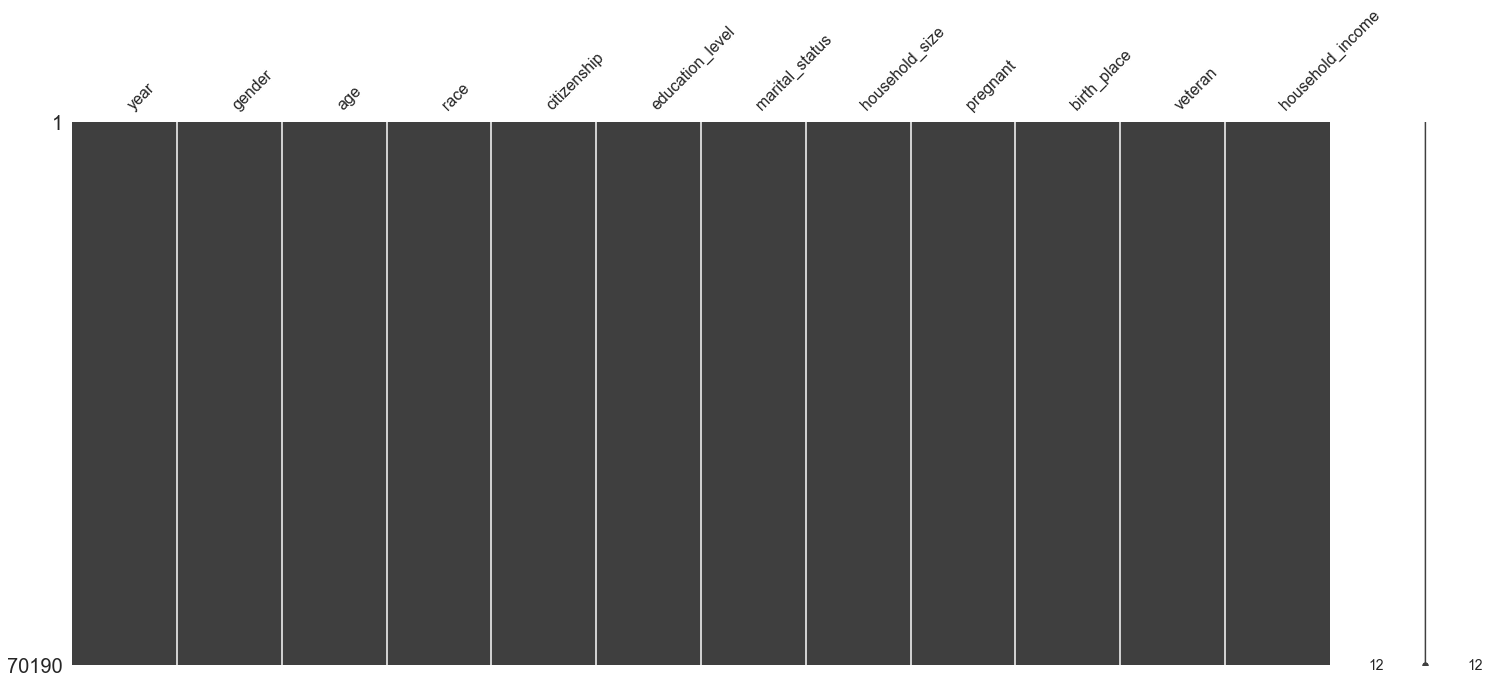

In [95]:
ms.matrix(demo_clean);

In [96]:
demo_clean.isna().sum()

year                0
gender              0
age                 0
race                0
citizenship         0
education_level     0
marital_status      0
household_size      0
pregnant            0
birth_place         0
veteran             0
household_income    0
dtype: int64

In [97]:
demo_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70190 entries, 31127 to 102956
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              70190 non-null  int64 
 1   gender            70190 non-null  int64 
 2   age               70190 non-null  int64 
 3   race              70190 non-null  object
 4   citizenship       70190 non-null  object
 5   education_level   70190 non-null  object
 6   marital_status    70190 non-null  object
 7   household_size    70190 non-null  int64 
 8   pregnant          70190 non-null  object
 9   birth_place       70190 non-null  object
 10  veteran           70190 non-null  object
 11  household_income  70190 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 7.0+ MB


In [98]:
demo_clean.head()

,year,gender,age,race,citizenship,education_level,marital_status,household_size,pregnant,birth_place,veteran,household_income
SEQN,,,,,,,,,,,,
31127,4,0,0,White,Citizen,Missing,Missing,4,Missing,USA,Missing,4
31128,4,1,11,Black,Citizen,Missing,Missing,7,No,USA,Missing,8
31129,4,0,15,Black,Citizen,Missing,Never Married,6,Missing,USA,Missing,10
31130,4,1,85,White,Citizen,Some College,Widowed,1,Missing,USA,No,4
31131,4,1,44,Black,Citizen,Some College,Married,4,No,USA,No,11


# Medical Conditions

In [99]:
path = r'Data/Conditions'
df_medcond = glob_concat(path, '*.XPT')

['Data/Conditions\\MCQ_D.XPT',
 'Data/Conditions\\MCQ_E.XPT',
 'Data/Conditions\\MCQ_F.XPT',
 'Data/Conditions\\MCQ_G.XPT',
 'Data/Conditions\\MCQ_H.XPT',
 'Data/Conditions\\MCQ_I.XPT',
 'Data/Conditions\\MCQ_J.XPT']

In [100]:
df_medcond.head()

,SEQN,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,MCQ053,MCQ080,MCQ092,MCD093,...,MCD240B,MCD240C,MCQ366A,MCQ366B,MCQ366C,MCQ366D,MCQ371A,MCQ371B,MCQ371C,MCQ371D
0,31128.000,2.000,nan,nan,nan,nan,2.000,nan,2.000,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,31129.000,2.000,nan,nan,nan,nan,2.000,nan,2.000,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,31130.000,2.000,nan,nan,nan,nan,2.000,2.000,9.000,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,31131.000,2.000,nan,nan,nan,nan,2.000,2.000,1.000,3.000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,31132.000,2.000,nan,nan,nan,nan,2.000,2.000,2.000,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [101]:
df_medcond.SEQN = df_medcond.SEQN.astype('int64')
df_medcond.set_index('SEQN', verify_integrity=True, inplace=True)

In [102]:
df_medcond.head()

,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,MCQ053,MCQ080,MCQ092,MCD093,MCQ140,...,MCD240B,MCD240C,MCQ366A,MCQ366B,MCQ366C,MCQ366D,MCQ371A,MCQ371B,MCQ371C,MCQ371D
SEQN,,,,,,,,,,,,,,,,,,,,,
31128,2.000,nan,nan,nan,nan,2.000,nan,2.000,nan,2.000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31129,2.000,nan,nan,nan,nan,2.000,nan,2.000,nan,2.000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31130,2.000,nan,nan,nan,nan,2.000,2.000,9.000,nan,2.000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31131,2.000,nan,nan,nan,nan,2.000,2.000,1.000,3.000,2.000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31132,2.000,nan,nan,nan,nan,2.000,2.000,2.000,nan,2.000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [103]:
list(df_medcond.columns.sort_values())

['AGQ030',
 'MCD093',
 'MCD180A',
 'MCD180B',
 'MCD180C',
 'MCD180D',
 'MCD180E',
 'MCD180F',
 'MCD180G',
 'MCD180K',
 'MCD180L',
 'MCD180M',
 'MCD180N',
 'MCD240A',
 'MCD240B',
 'MCD240C',
 'MCD330',
 'MCQ010',
 'MCQ025',
 'MCQ035',
 'MCQ040',
 'MCQ050',
 'MCQ051',
 'MCQ053',
 'MCQ070',
 'MCQ075',
 'MCQ080',
 'MCQ082',
 'MCQ084',
 'MCQ086',
 'MCQ092',
 'MCQ140',
 'MCQ149',
 'MCQ150G',
 'MCQ150Q',
 'MCQ151',
 'MCQ160A',
 'MCQ160B',
 'MCQ160C',
 'MCQ160D',
 'MCQ160E',
 'MCQ160F',
 'MCQ160G',
 'MCQ160K',
 'MCQ160L',
 'MCQ160M',
 'MCQ160N',
 'MCQ160O',
 'MCQ170K',
 'MCQ170L',
 'MCQ170M',
 'MCQ180A',
 'MCQ180B',
 'MCQ180C',
 'MCQ180D',
 'MCQ180E',
 'MCQ180F',
 'MCQ180G',
 'MCQ180K',
 'MCQ180L',
 'MCQ180M',
 'MCQ180N',
 'MCQ190',
 'MCQ191',
 'MCQ195',
 'MCQ203',
 'MCQ206',
 'MCQ220',
 'MCQ230A',
 'MCQ230B',
 'MCQ230C',
 'MCQ230D',
 'MCQ240A',
 'MCQ240AA',
 'MCQ240B',
 'MCQ240BB',
 'MCQ240C',
 'MCQ240CC',
 'MCQ240D',
 'MCQ240DD',
 'MCQ240DK',
 'MCQ240E',
 'MCQ240F',
 'MCQ240G',
 'MCQ240H',
 

In [104]:
medcond_tokeep = ['AGQ030', 'MCQ010', 'MCQ025', 'MCQ035', 'MCQ050', 
                  'MCQ053', 'MCQ080', 'MCQ092', 'MCQ160A', 'MCQ160B', 
                  'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ160G', 
                  'MCQ160K', 'MCQ160L', 'MCQ160M', 'MCQ170K', 'MCQ170L', 
                  'MCQ170M', 'MCQ180A', 'MCD180A', 'MCQ180B', 'MCD180B', 
                  'MCQ180C', 'MCD180C', 'MCQ180D', 'MCD180D', 'MCQ180E', 
                  'MCD180E', 'MCQ180F', 'MCD180F', 'MCQ180G', 'MCD180G', 
                  'MCQ180K', 'MCD180K', 'MCQ180L', 'MCD180L', 'MCQ180M', 
                  'MCD180M', 'MCQ190', 'MCQ191', 'MCQ195', 'MCQ220', 'MCQ230A', 
                  'MCQ230B', 'MCQ230C', 'MCQ230D', 'MCQ240DK', 'MCD240A', 
                  'MCQ300A', 'MCQ300B', 'MCQ300C']

len(medcond_tokeep)

54

In [105]:
medcond_clean = cols_tokeep(df_medcond, medcond_tokeep)

In [106]:
medcond_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67203 entries, 31128 to 102956
Data columns (total 54 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MCQ010    67201 non-null  float64
 1   MCQ025    9977 non-null   float64
 2   MCQ035    9979 non-null   float64
 3   MCQ050    4874 non-null   float64
 4   MCQ053    67201 non-null  float64
 5   MCQ080    44700 non-null  float64
 6   MCQ092    58636 non-null  float64
 7   MCQ160A   39747 non-null  float64
 8   MCQ160B   39748 non-null  float64
 9   MCQ160C   39748 non-null  float64
 10  MCQ160D   39748 non-null  float64
 11  MCQ160E   39748 non-null  float64
 12  MCQ160F   39748 non-null  float64
 13  MCQ160G   39748 non-null  float64
 14  MCQ160K   39748 non-null  float64
 15  MCQ160L   39748 non-null  float64
 16  MCQ160M   39748 non-null  float64
 17  MCQ170K   2292 non-null   float64
 18  MCQ170L   1584 non-null   float64
 19  MCQ170M   4010 non-null   float64
 20  MCQ180A   9019 non-null

## Combining Similar Columns

In [108]:
medcond_clean.MCD180A.value_counts(dropna=False)

nan       65508
50.000      148
60.000      114
40.000       90
55.000       83
          ...  
77.000        7
29.000        6
19.000        4
79.000        4
17.000        4
Name: MCD180A, Length: 67, dtype: int64

In [109]:
medcond_clean.MCQ180A.value_counts(dropna=False)

nan       58184
50.000      614
40.000      457
60.000      450
55.000      401
          ...  
11.000        4
83.000        3
84.000        2
81.000        2
0.000         1
Name: MCQ180A, Length: 88, dtype: int64

In [110]:
medcond_clean.MCD180A.fillna(0, inplace=True)
medcond_clean.MCQ180A.fillna(0, inplace=True)

In [113]:
medcond_clean['arthritis_onset'] = medcond_clean['MCD180A'] + medcond_clean['MCQ180A']
medcond_clean['arthritis_onset'] = medcond_clean['arthritis_onset'].astype('int64')

In [114]:
medcond_clean.arthritis_onset.value_counts(dropna=False)

0     56490
50      762
60      564
40      547
55      484
      ...  
82        5
11        4
83        3
84        2
81        2
Name: arthritis_onset, Length: 87, dtype: int64

In [115]:
medcond_clean.drop(columns=['MCD180A', 'MCQ180A'], inplace=True)

In [107]:
medcond_clean.columns

Index(['MCQ010', 'MCQ025', 'MCQ035', 'MCQ050', 'MCQ053', 'MCQ080', 'MCQ092',
       'MCQ160A', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F',
       'MCQ160G', 'MCQ160K', 'MCQ160L', 'MCQ160M', 'MCQ170K', 'MCQ170L',
       'MCQ170M', 'MCQ180A', 'MCQ180B', 'MCQ180C', 'MCQ180D', 'MCQ180E',
       'MCQ180F', 'MCQ180G', 'MCQ180K', 'MCQ180L', 'MCQ180M', 'MCQ190',
       'MCQ220', 'MCQ230A', 'MCQ230B', 'MCQ230C', 'MCQ230D', 'MCQ240DK',
       'MCQ300A', 'MCQ300B', 'MCQ300C', 'MCQ191', 'MCQ195', 'AGQ030',
       'MCD180A', 'MCD180B', 'MCD180C', 'MCD180D', 'MCD180E', 'MCD180F',
       'MCD180M', 'MCD180G', 'MCD180K', 'MCD180L', 'MCD240A'],
      dtype='object')

In [ ]:
medcond_clean.rename(columns={'MCQ010': 'asthma', 
                              'MCQ025': 'asthma_onset', 
                              'MCQ035': 'asthma_currently', 
                              'MCQ050': 'asthma_emergency', 
                              'MCQ053': 'anemia', 
                              'MCQ080': 'ever_overweight', 
                              'MCQ092': 'blood_transfusion',
                              'MCQ160A': 'arthritis',
                              'MCQ160B': 'heart_failure', 
                              'MCQ160C': 'heart_disease', 
                              'MCQ160D': 'angina', 
                              'MCQ160E': 'heart_attack', 
                              'MCQ160F': 'stroke', 
                              'MCQ160G': 'emphysema', 
                              'MCQ160K': 'chronic_bronchitis', 
                              'MCQ160L': 'liver_condition',
                              'MCQ160M': 'thyroid_problem',
                              'MCQ170K': 'brochitis_currently', 
                              'MCQ170L': 'liver_condition_currently', 
                              'MCQ170M': 'thyroid_problem_currently', 
                              'MCQ180A': 'arthritis_onset', 
                              'MCQ180B': 'heart_failure_onset', 
                              'MCQ180C': 'heart_disease_onset', 
                              'MCQ180D': 'angina_onset', 
                              'MCQ180E': 'heart_attack_onset',
                              'MCQ180F': 'stroke_onset', 
                              'MCQ180G': 'emphysema_onset', 
                              'MCQ180K': 'bronchitis_onset', 
                              'MCQ180L': 'liver_condition_onset', 
                              'MCQ180M': 'thyroid_problem_onset',
                              'MCQ190': 'arthritis_type', 
                              'MCQ220': 'cancer', 
                              'MCQ230A': 'cancer_type1', 
                              'MCQ230B': 'cancer_type2', 
                              'MCQ230C', 
                              'MCQ230D',
                              'MCQ240DK': 'cancer_onset', 
                              'MCQ300A': 'heart_attack_relative', 
                              'MCQ300B': 'asthma_relative', 
                              'MCQ300C': 'relative_diabetes', 
                              'MCQ191', 
                              'MCQ195',
                              'AGQ030': 'hay_fever', 
                              'MCD180A': '', 
                              'MCD180B', 
                              'MCD180C', 
                              'MCD180D', 
                              'MCD180E',
                              'MCD180F', 
                              'MCD180M', 
                              'MCD180G', 
                              'MCD180K', 
                              'MCD180L', 
                              'MCD240A'
                            }, inplace=True)

# Examination

In [ ]:
path = r'Data/Examination'
df_exam = glob_concat(path, '*.XPT')